# Выявления закономерностей, определяющие успешность игр для интернет-магазина

Интернет-магазин продаёт по всему миру компьютерные игры. Для каждой игры из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Целью проекта - выявить закономерности, определяющие успешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Задачи для выполнения проекта следующие:
1. На основе данных за 2016 год спланировать кампанию на 2017-й;
2. Предобработка данных (преобразования типов данных, обработка пропусков);
3. Исследовательский анализ данных;
4. Определение рейтинга предпочтений пользователей для каждого региона (NA, EU, JP);
5. Проверка гипотез.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Оглавление
1. [Открытие файлов](#start)
2. [Предобработка данных](#preprocessing_data)
3. [Исследовательский анализ данных](#analyse)
4. [Портрет пользователя каждого региона (NA, EU, JP)](#users_stat)
5. [Проверка гипотез](#hypotheses)
6. [Общие выводы](#conclusions)

## 1. Открытее файла с данными и изучение общей информации<a id="start"></a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


Проблемы выявленые в таблице:
1. Названия сталбцов начинаются с большой буквы, необходимо перевести их в нижний регистр;
2. Пустые ячейки обнаружены в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;
3. столбец year_of_release не в формате даты.

## 2. Предобработка данных<a id="preprocessing_data"></a> 

Замена названий столбцов (приведение к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразование типов данных

In [7]:
#выявление пропусков методом isnull и sum
df_null = df.isnull().sum()
df_null

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#Процент нулей
df_null_p = df_null/len(df)*100
df_null_p[df_null_p>0]

name                0.011965
year_of_release     1.609333
genre               0.011965
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [9]:
df['rating'] = df['rating'].replace(np.nan, 'undefined')
df['user_score'] = df['user_score'].replace('tbd', np.nan ).astype('float')

#Преобразование типов данных
converted_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df[converted_int.columns] = converted_int

converted_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df[converted_float.columns] = converted_float

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float32
genre              16713 non-null object
na_sales           16715 non-null float32
eu_sales           16715 non-null float32
jp_sales           16715 non-null float32
other_sales        16715 non-null float32
critic_score       8137 non-null float32
user_score         7590 non-null float32
rating             16715 non-null object
dtypes: float32(7), object(4)
memory usage: 4.7 MB


Все столбцы с пропусками оставлены без изменений, так как неизвестно каким должно быть содержимое даных ячеек. Значение tbd (уточняется) в столбце user score изменено на NaN. Пропуски в столбце rating указаны как undefined (неопределено) для учет игр без рейтинга. Причины пропусков могут быть ошибки при заполнении данных, отсутсвие данных и т.д.

Суммарные продажи во всех регионах

In [10]:
df['tоtal_sales'] = df.na_sales + df.eu_sales + df.jp_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tоtal_sales
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,74.089996
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,undefined,39.470001
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,32.230000
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,29.820002
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,undefined,30.380001


## 3. Исследовательский анализ данных<a id="analyse"></a> 

* Cколько игр выпускалось в разные годы?

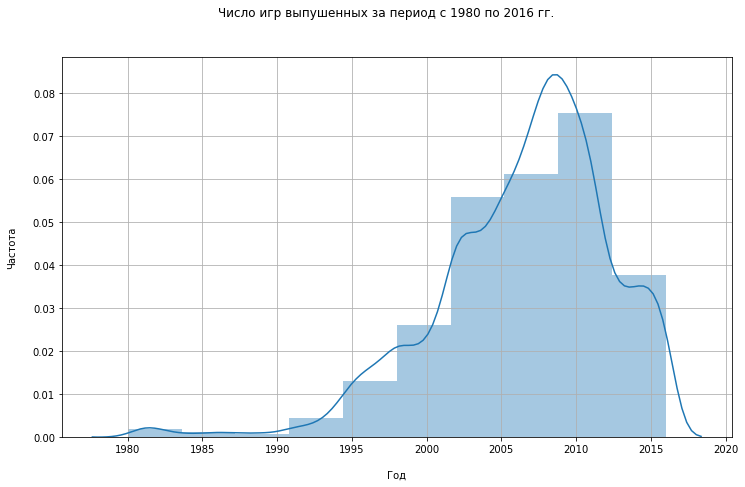

In [11]:
plt.figure(figsize=(12,7))
sns.distplot(df['year_of_release'], bins = 10)
plt.grid()
plt.suptitle('Число игр выпушенных за период с 1980 по 2016 гг.'+ "\n")
plt.ylabel('Частота'+"\n")
plt.xlabel("\n"+'Год')
plt.show()

По гистограмма выше видно, что в пер c 1980 года до 1990 выпускалось небольшое количество игр, после 90-го года производство игр начало стремительно рости и доходит до своего пика в 2011 году. После 2011 года число выпушинных игр резко снизилось.

* Как менялись продажи по платформам?

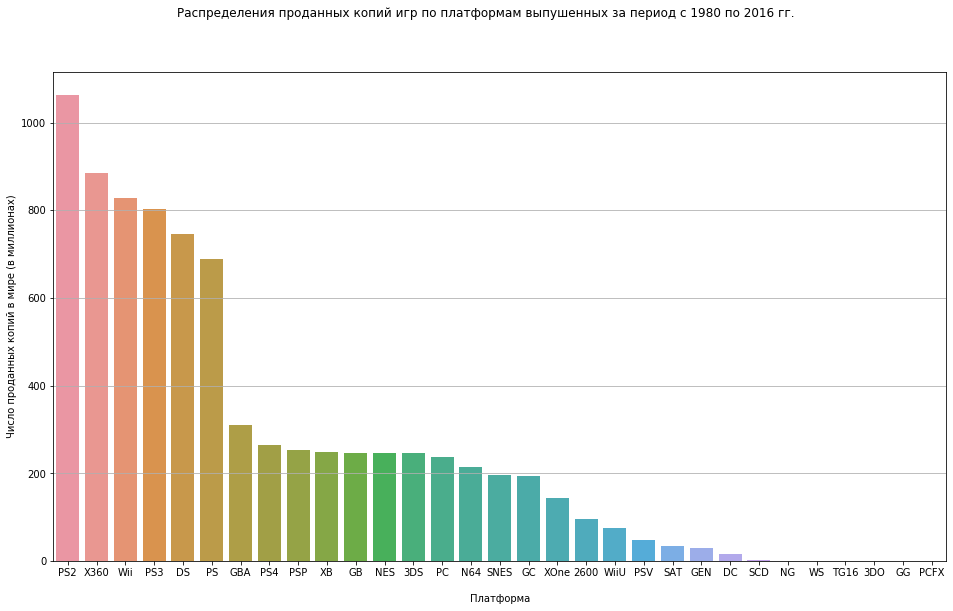

In [12]:
platforms = df.pivot_table(index='platform', values='tоtal_sales', aggfunc='sum').sort_values('tоtal_sales', ascending=False)
plt.figure(figsize=(16,9))
plt.grid()
sns.barplot(x = platforms.index, y = 'tоtal_sales', data=platforms)
plt.suptitle('Распределения проданных копий игр по платформам выпушенных за период с 1980 по 2016 гг.'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Платформа')
plt.show()

По графику распределения видно, что больше всего игр продано на платформе PS2, по состоянию на 2016 год на этой платформе продано более 1 млрд. копий. Также по графику можно определить самые популярные платформы для игр, ими являются: PS, PS2, PS3, X360, Nentendo DS и Nentendo Wii. Причем разрыв по продажам игр между выше указанных платформ и остальными довольно велик.

* Распределение игр на популярных плотформах (PS, PS2, PS3, X360, DS, Wii)

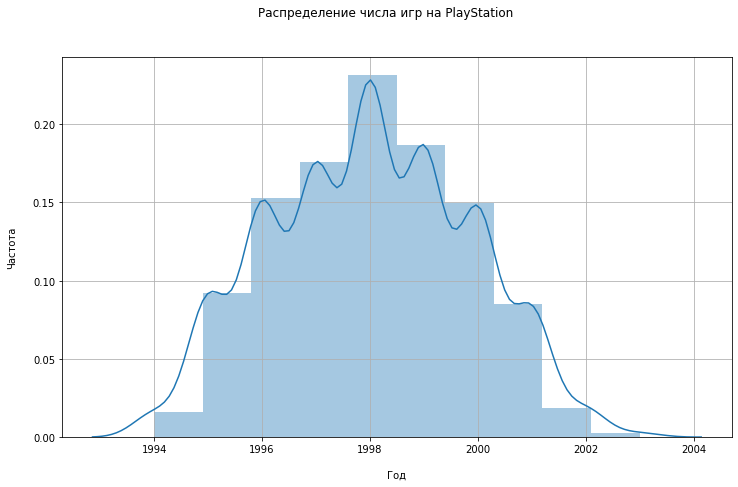

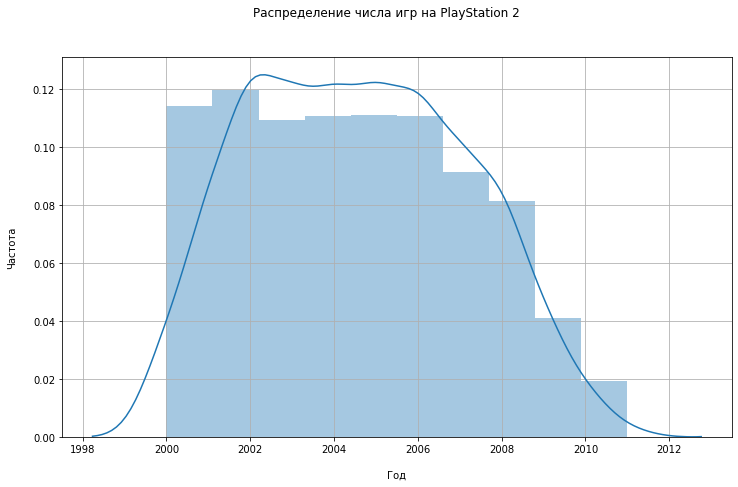

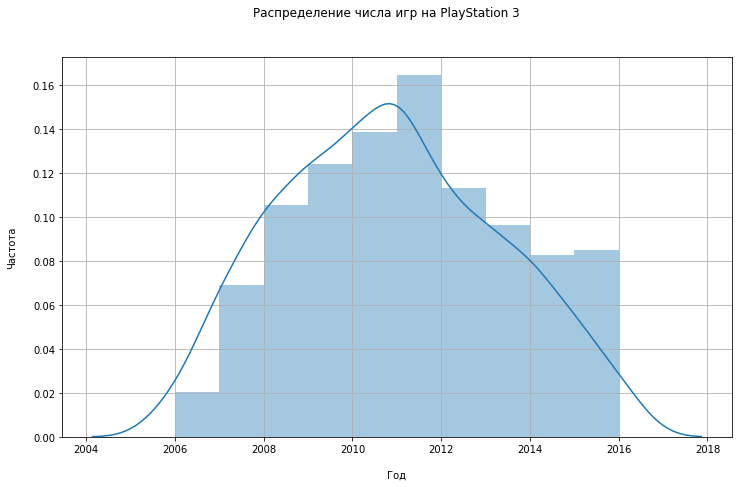

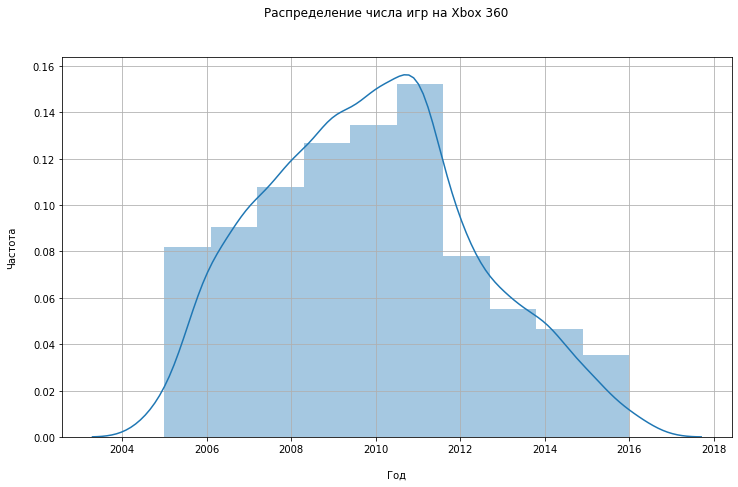

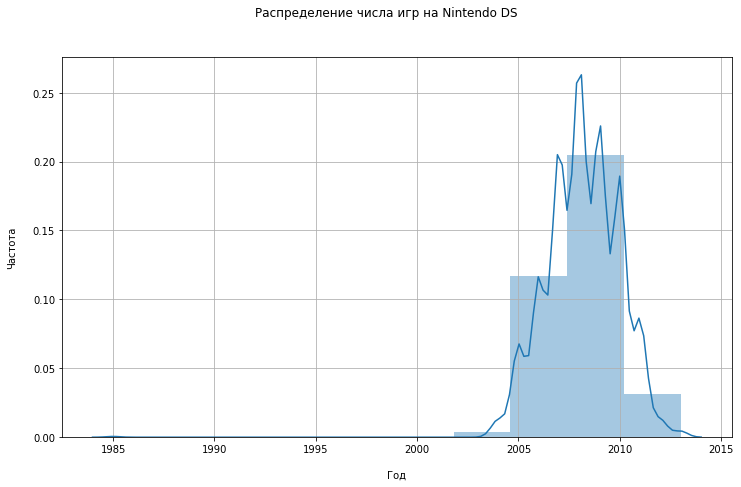

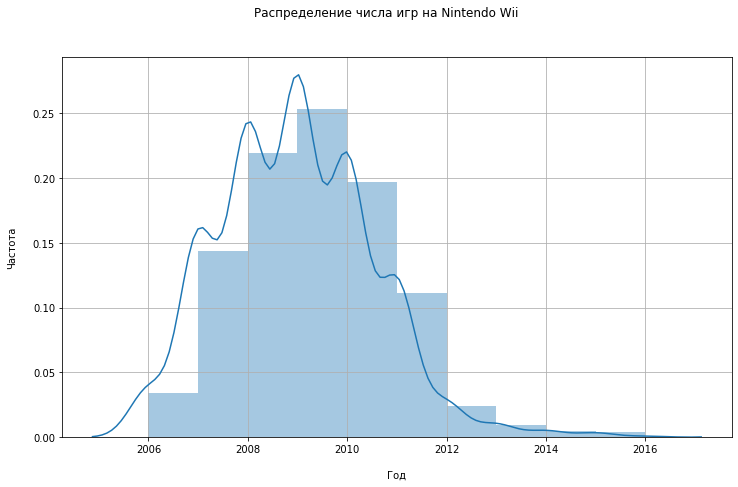

In [13]:
PS = df.query('platform == "PS"')
PS2 = df.query('platform == "PS2"')
PS3 = df.query('platform == "PS3"')
DS = df.query('platform == "DS"')
X360 = df.query('platform == "X360"')
Wii = df.query('platform == "Wii"')

i = 0
name1 = ['Распределение числа игр на PlayStation','Распределение числа игр на PlayStation 2', 'Распределение числа игр на PlayStation 3', 'Распределение числа игр на Xbox 360', 'Распределение числа игр на Nintendo DS', 'Распределение числа игр на Nintendo Wii']
for research_group in [PS, PS2, PS3, X360, DS, Wii]:
    plt.figure(figsize=(12,7))
    sns.distplot(research_group['year_of_release'], bins = 10)
    plt.grid()
    plt.suptitle(name1[i])
    plt.ylabel('Частота'+"\n")
    plt.xlabel("\n" + 'Год')
    i+=1
    plt.show()

По гистограммам распределения игр по годам на популярных платформах следует, что все вышеуказанные платформы к 2016 году либо теряют популярность, либо на данных платформах уже не продают игры. Приставка PlayStation усовершенствовалась каждый раз, когда снижались продажи игр. Для платформы DS характерен взрывной рост в первые годы и резкое падение уже через 5 лет. В целом срок существования платформы равен около 6 - 10 лет.

* Данные за соответствующий актуальный период

В качестве актуального периода возьмем промежуток от 2012 до 2016.

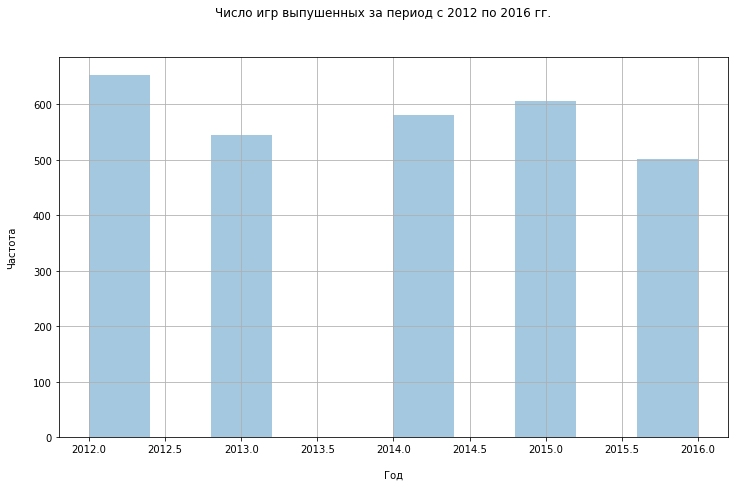

In [14]:
df_actual = df.query('year_of_release > 2011')
plt.figure(figsize=(12,7))
sns.distplot(df_actual['year_of_release'],  kde=False, bins = 10)
plt.grid()
plt.suptitle('Число игр выпушенных за период с 2012 по 2016 гг.'+ "\n")
plt.ylabel('Частота' + "\n")
plt.xlabel("\n" + 'Год')
plt.show()

Выделив период с 2012 по 2016 годы заметно, что продажа игр держится примерно на одном уровне, но имеет тенденцию к снижению. 

* Платформы лидерующие по продажам и потенциально прибыльные платформы

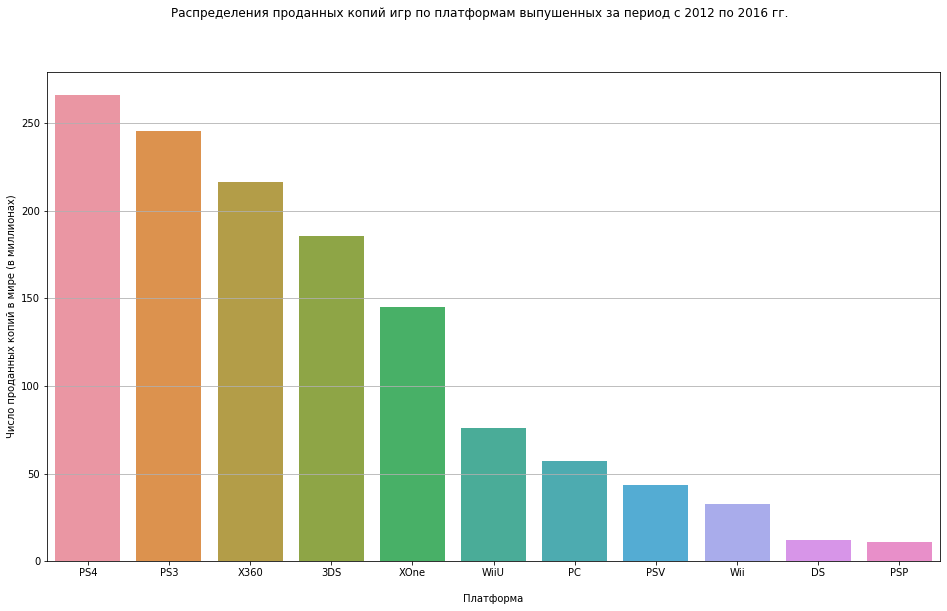

In [15]:
platforms_actual = (df_actual.pivot_table(index='platform', values='tоtal_sales', aggfunc='sum')
                    .sort_values('tоtal_sales', ascending=False))
plt.figure(figsize=(16,9))
plt.grid()
sns.barplot(x=platforms_actual.index, y = 'tоtal_sales' , data = platforms_actual)
plt.suptitle('Распределения проданных копий игр по платформам выпушенных за период с 2012 по 2016 гг.'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Платформа')
plt.show()

По графику распределения за 2012-2016 гг. видно, что больше всего игр продано на платформе PS4, по состоянию на 2016 год на этой платформе продано 266 млн. копий. Также по графику можно определить самые популярные платформы для игр, ими являются: PS 4, PS 3, Xbox 360, Nintendo 3DS и Xbox One.

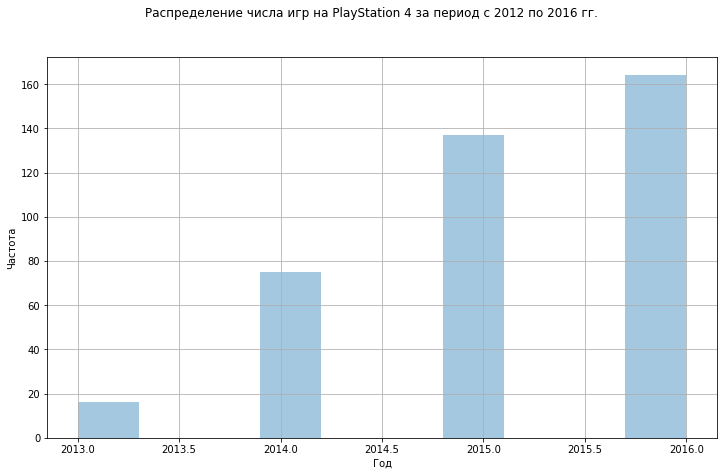

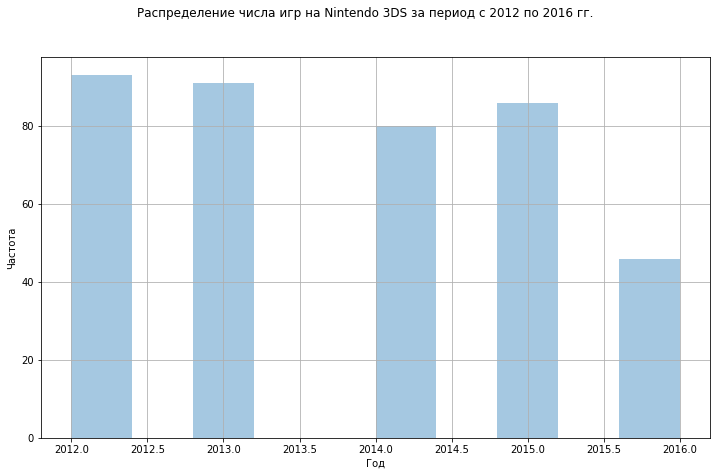

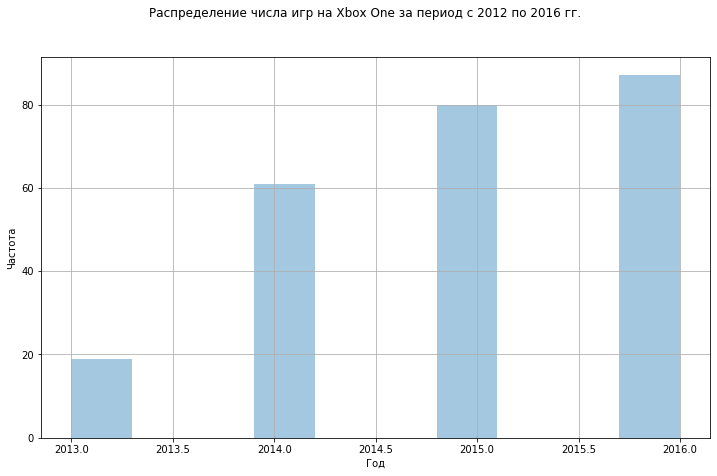

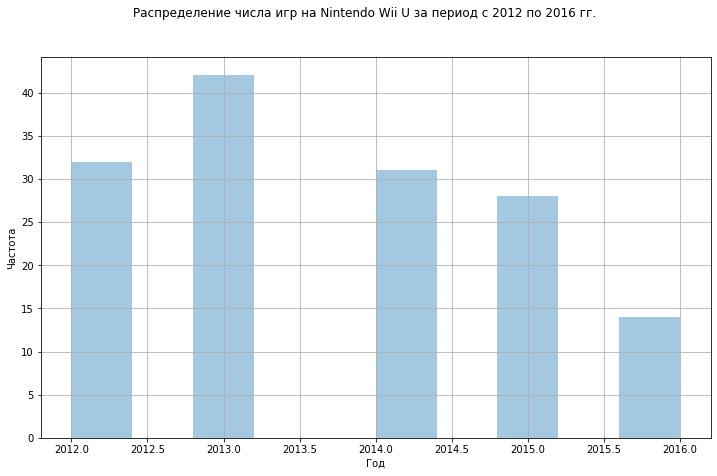

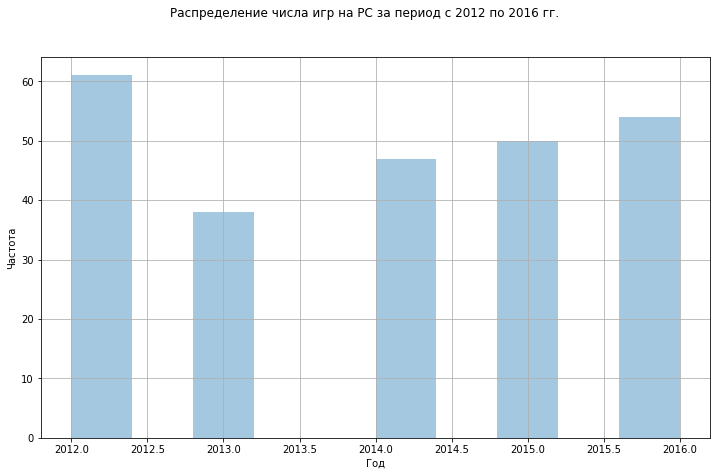

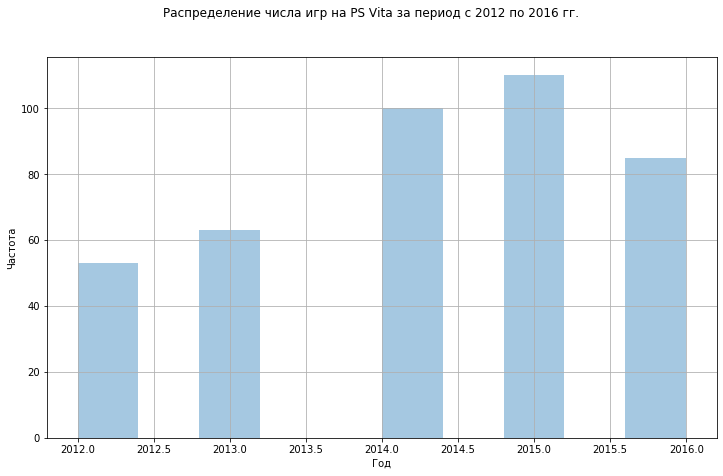

In [16]:
PS4 = df_actual.query('platform == "PS4"')
N3DS = df_actual.query('platform == "3DS"')
XOne = df_actual.query('platform == "XOne"')
WiiU = df_actual.query('platform == "WiiU"')
PC = df_actual.query('platform == "PC"')
PSV = df_actual.query('platform == "PSV"')

i = 0
name1 = ['Распределение числа игр на PlayStation 4 за период с 2012 по 2016 гг.','Распределение числа игр на Nintendo 3DS за период с 2012 по 2016 гг.', 'Распределение числа игр на Xbox One за период с 2012 по 2016 гг.', 'Распределение числа игр на Nintendo Wii U за период с 2012 по 2016 гг.', 'Распределение числа игр на PC за период с 2012 по 2016 гг.', 'Распределение числа игр на PS Vita за период с 2012 по 2016 гг.']
for research_group in [PS4, N3DS, XOne, WiiU, PC, PSV]:
    plt.figure(figsize=(12,7))
    sns.distplot(research_group['year_of_release'], kde = False, bins = 10)
    plt.grid()
    plt.suptitle(name1[i])
    plt.ylabel('Частота')
    plt.xlabel('Год')
    i+=1
    plt.show()

По распределениям игр по годам с (2012 по 2016 гг.) на популярных платформах можно выделить платформы, которые к 2016 году активно набируют популярность, а именно PS 4 и Xbox One. Также стоит отметить PC, т.к. продажа игр на данной платформе держится примерно на одном уровне, а в последние 3 года наблюдается небольшой рост. Продажы на остальных платформах к 2016 падоуют (3DS, Wii U, PS Vita). Все платформы, на которых наблюдаются спад продаж игр, в изученный период времени, является портативными, что говорит об общем снижении популярности портативных платформ.

* Диаграммы размаха по глобальным продажам игр на всех платформах за период с 2012 по 2016 гг.

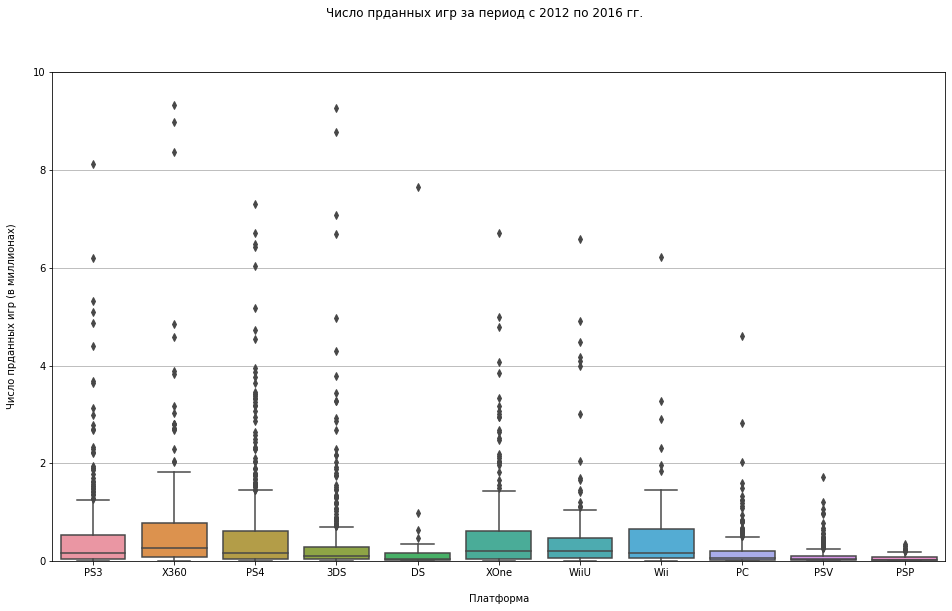

In [17]:
plt.figure(figsize=(16,9))
plt.grid()
sns.boxplot(y = 'tоtal_sales', x='platform' , data= df_actual)
plt.ylim(0,10)
plt.suptitle('Число прданных игр за период с 2012 по 2016 гг.')
plt.ylabel('Число прданных игр (в миллионах)'+"\n")
plt.xlabel("\n"+'Платформа')
plt.show()

In [18]:
dfa = df_actual.loc[:,['platform','tоtal_sales']]
dfa.query('platform == "PS4"').describe()

,tоtal_sales
count,392.000000
mean,0.678036
std,1.355221
min,0.010000
25%,0.050000
50%,0.170000
75%,0.612500
max,12.250000


In [19]:
dfa.query('platform == "XOne"').describe()

,tоtal_sales
count,247.000000
mean,0.587247
std,0.942412
min,0.010000
25%,0.050000
50%,0.200000
75%,0.625000
max,6.710000


По диаграмме размаха приведенной выше видно, что медиана на всех плафтормах варьируется около значения в 200 тыс. проданных копий, при этом для всех платформ характерны больше хвосты на высоких значениях. Также на многих платформах диаграмма размаха скошена вправо, следовательно многии игры продаются больше медианного значения. 

Разница в числе проданных копий игр между платформами может быть из-за:
* набирающей популярности некоторых платформ в актуальный период, соответственно, игры на платформах теряющие популярность к 2016 году продавались хуже;
* типа платформы. Игры на персональных платформах продаются лучше, чем на портативных;
* Сложности обхода покупки игр (пиратство) и спроса пользователей платформе к покупке игр. 

Дисперсия и стандартное откланение глобальных продаж на платформах PS4 и Xbox One

In [20]:
print('Дисперсия глобальных продаж игр на PS4 = {:.2f}'.format(np.var(dfa.query('platform == "PS4"').tоtal_sales, ddof=1)))
print('Стандартное откланение глобальных продаж игр на PS4 = {:.2f}'.format(np.std(dfa.query('platform == "PS4"').tоtal_sales, ddof=1)))

Дисперсия глобальных продаж игр на PS4 = 1.84
Стандартное откланение глобальных продаж игр на PS4 = 1.36


In [21]:
print('Дисперсия глобальных продаж игр на Xbox One = {:.2f}'.format(np.var(dfa.query('platform == "XOne"').tоtal_sales, ddof=1)))
print('Стандартное откланение глобальных продаж игр на Xbox One = {:.2f}'.format(np.std(dfa.query('platform == "XOne"').tоtal_sales, ddof=1)))

Дисперсия глобальных продаж игр на Xbox One = 0.89
Стандартное откланение глобальных продаж игр на Xbox One = 0.94


Дисперсия и стандартное откланение продаж на платформах PS4 и Xbox One оказались малыми, следовательно, данные менее разбросаны.

* Влияние на продажи внутри платформ PS3, PS4, Xbox One, PC отзывы пользователей и критиков.

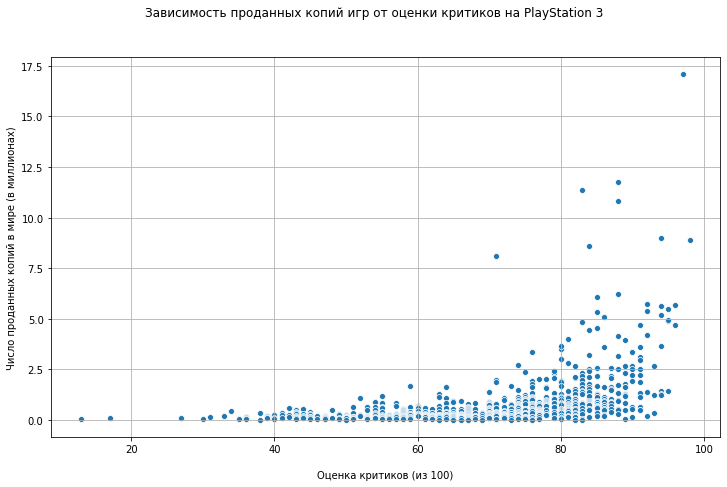

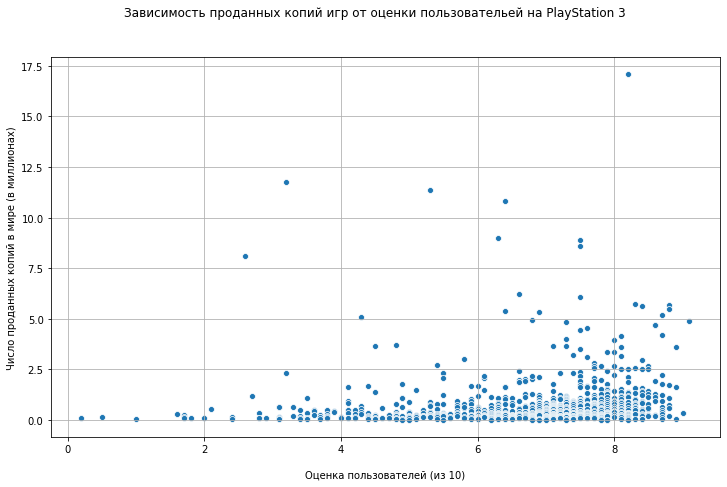

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'critic_score', y = 'tоtal_sales', data = PS3)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки критиков на PlayStation 3'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка критиков (из 100)')
plt.show()

plt.figure(figsize=(12,7))
sns.scatterplot(x = 'user_score', y = 'tоtal_sales', data = PS3)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки пользовательей на PlayStation 3'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка пользователей (из 10)')
plt.show()

In [23]:
#Расчет коэффициента корреляции
print('Коэффициента корреляции заисимости продаж от оценки критиков на платформе PS3: {:.2f}'.format(PS3['tоtal_sales'].corr(PS3['critic_score'])))
print('Коэффициента корреляции заисимости продаж от оценки пользователей на платформе PS3: {:.2f}'.format(PS3['tоtal_sales'].corr(PS3['user_score'])))

Коэффициента корреляции заисимости продаж от оценки критиков на платформе PS3: 0.44
Коэффициента корреляции заисимости продаж от оценки пользователей на платформе PS3: 0.13


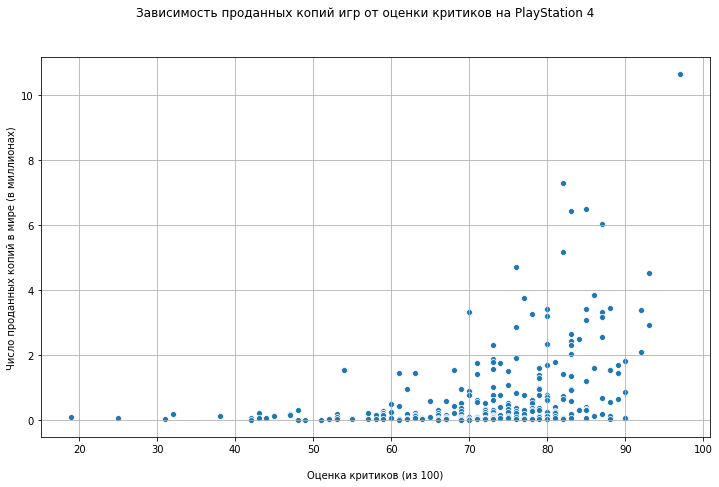

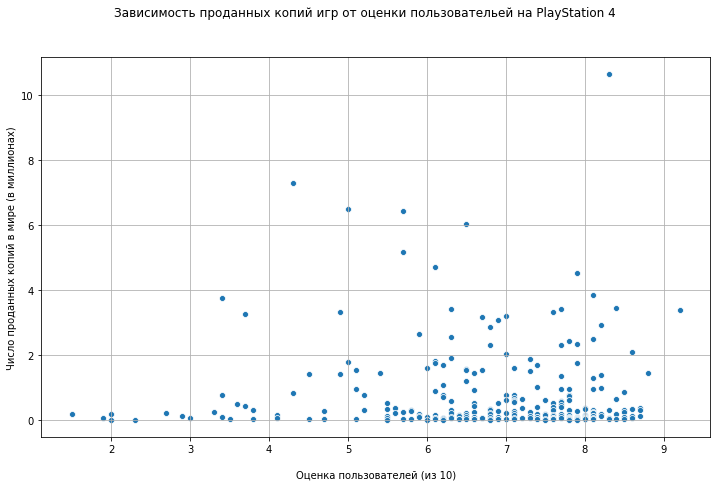

In [24]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'critic_score', y = 'tоtal_sales', data = PS4)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки критиков на PlayStation 4'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка критиков (из 100)')

plt.figure(figsize=(12,7))
sns.scatterplot(x = 'user_score', y = 'tоtal_sales', data = PS4)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки пользовательей на PlayStation 4'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка пользователей (из 10)')
plt.show()

In [25]:
#Расчет коэффициента корреляции
print('Коэффициента корреляции заисимости продаж от оценки критиков на платформе PS4: {:.2f}'.format(PS4['tоtal_sales'].corr(PS4['critic_score'])))
print('Коэффициента корреляции заисимости продаж от оценки пользователей на платформе PS4: {:.2f}'.format(PS4['tоtal_sales'].corr(PS4['user_score'])))

Коэффициента корреляции заисимости продаж от оценки критиков на платформе PS4: 0.41
Коэффициента корреляции заисимости продаж от оценки пользователей на платформе PS4: -0.03


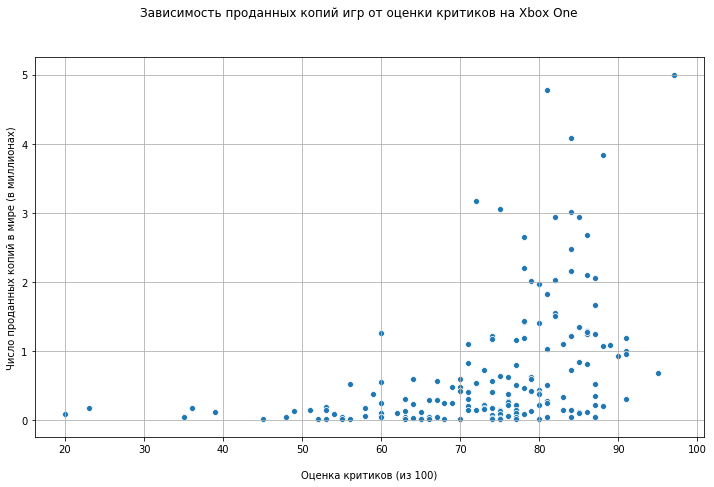

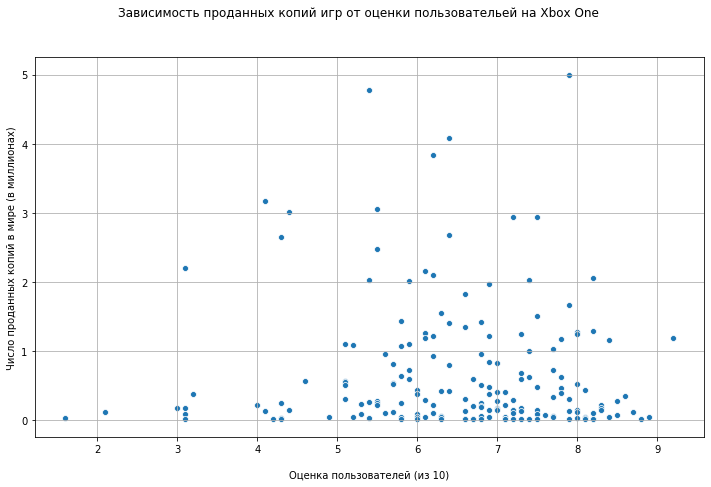

In [26]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'critic_score', y = 'tоtal_sales', data = XOne)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки критиков на Xbox One'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка критиков (из 100)')

plt.figure(figsize=(12,7))
sns.scatterplot(x = 'user_score', y = 'tоtal_sales', data = XOne)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки пользовательей на Xbox One'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка пользователей (из 10)')
plt.show()

In [27]:
#Расчет коэффициента корреляции
print('Коэффициента корреляции заисимости продаж от оценки критиков на платформе XOne: {:.2f}'.format(XOne['tоtal_sales'].corr(XOne['critic_score'])))
print('Коэффициента корреляции заисимости продаж от оценки пользователей на платформе XOne: {:.2f}'.format(XOne['tоtal_sales'].corr(XOne['user_score'])))

Коэффициента корреляции заисимости продаж от оценки критиков на платформе XOne: 0.42
Коэффициента корреляции заисимости продаж от оценки пользователей на платформе XOne: -0.07


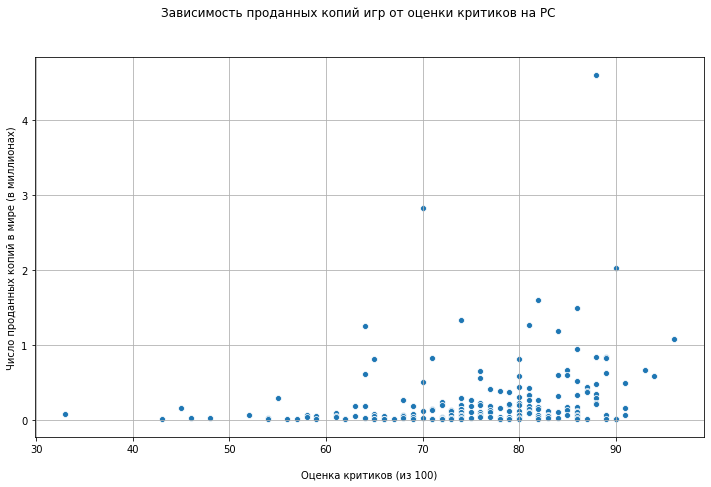

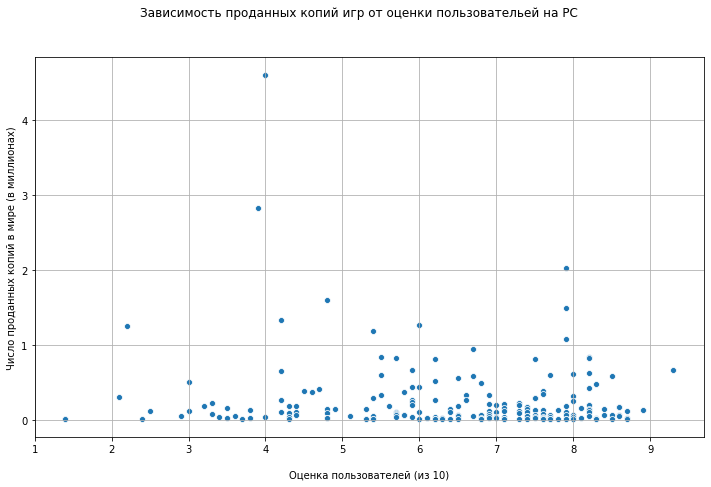

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'critic_score', y = 'tоtal_sales', data = PC)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки критиков на PC'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка критиков (из 100)')

plt.figure(figsize=(12,7))
sns.scatterplot(x = 'user_score', y = 'tоtal_sales', data = PC)
plt.grid()
plt.suptitle('Зависимость проданных копий игр от оценки пользовательей на PC'+ "\n")
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Оценка пользователей (из 10)')
plt.show()

In [29]:
#Расчет коэффициента корреляции
print('Коэффициента корреляции заисимости продаж от оценки критиков на платформе PC: {:.2f}'.format(PC['tоtal_sales'].corr(PC['critic_score'])))
print('Коэффициента корреляции заисимости продаж от оценки пользователей на платформе PC: {:.2f}'.format(PC['tоtal_sales'].corr(PC['user_score'])))

Коэффициента корреляции заисимости продаж от оценки критиков на платформе PC: 0.24
Коэффициента корреляции заисимости продаж от оценки пользователей на платформе PC: -0.12


По диаграммам рассеяния и по посчитанным коэффициентам корреляции отношения числа продаж от оценки критиков и пользователей на платформах PS3, PS4, XOne и PC видно, что в первом случае существуют небольшая зависимость, т.е. с увеличением оценки критиков, растет число продаж копий игр. Во втором случае зависимость небольшая, т.е. игра продаваемость игры немного зависит от того какой у неё рейтинг среди пользователей. Небольшая зависимость из-за того, что в исследовании используется данные за небольшой период (2012-2016 гг.), также некоторые платформы и игры являются относительно новыми, следовательно, оценки пользователей в этом случае могут быть не точными. По графику заметно, что при высоких оценках геймеров и критиков есть много игр с низким числом продаж.

* Общее распределение игр по жанрам

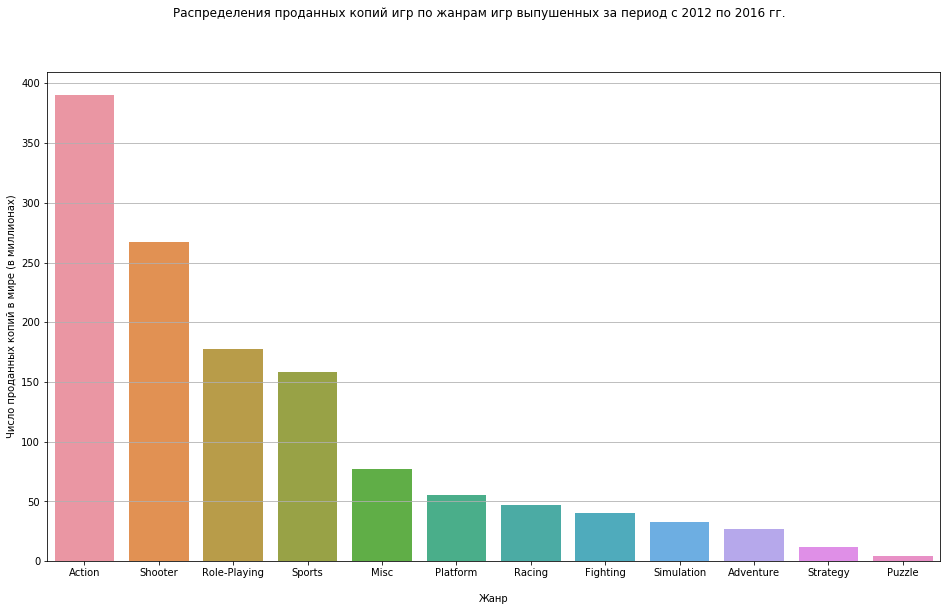

In [30]:
q = (df_actual.pivot_table(index='genre', values='tоtal_sales', aggfunc='sum')
.sort_values('tоtal_sales', ascending=False))
plt.figure(figsize=(16,9))
plt.grid()
sns.barplot(x = q.index, y = 'tоtal_sales', data = q)
plt.suptitle('Распределения проданных копий игр по жанрам игр выпушенных за период с 2012 по 2016 гг.')
plt.ylabel('Число проданных копий в мире (в миллионах)')
plt.xlabel("\n" + 'Жанр')
plt.show()

По графику распределения проданных копий игр от жанра видно, что самым прибыльным жанром является Action, по состоянию на 2016 год продано 389 млн. Меньше всего продано игр с жанрами стратегии и пазлы (12 млн. и 4 млн. соответственно). Стоит отметить, что больше всего продаются игры с такими жанрами, которым присуще простые правила, подвижность и зрелищность. Соответственно, сложные и невзрачные по графике игры менее прибыльны.

### Вывод

В данном разделе был проведен анализ данных о проданных играх и выяснились следующее выводы:

* Производство игр начало активно разрастется после середины 90-х годов и дошла своего пика в 2008 году (1427 выпущенных игр), и после чего начало активно падать;
* За все время самыми популярными платформами являются PS, PS 2, PS 3, Xbox 360, Nentendo DS и Nentendo Wii;
* За период с 2012 по 2016 годы популярными платформами являются PS 4, PS 3, Xbox 360, Nintendo 3DS и Xbox One;
* Прибыльными платформами являются PS 4, Xbox One и PC, т.к. на 2017 год для данных платформ прогнозируется рост продаж игр;
* Отзывы критиков имеет некоторое влияние на продажи игр, а отзывы пользователей также влияют на продажи игр, но чуть меньше чем отзывы критиков;
* Самым прибыльным жанром является Action (389 млн. проданных копий). Непопулярные жанры - стратегии и пазлы (12 млн. и 4 млн. проданных копий соответственно). 
* Больше всего продаются игры с такими жанрами, которым присуще простые правила, подвижность и зрелищность. Соответственно, сложные и невзрачные по графике игры менее прибыльны.

## 4. Портрет пользователя каждого региона (NA, EU, JP)<a id="users_stat"></a> 

* Топ-5 популярных платформ

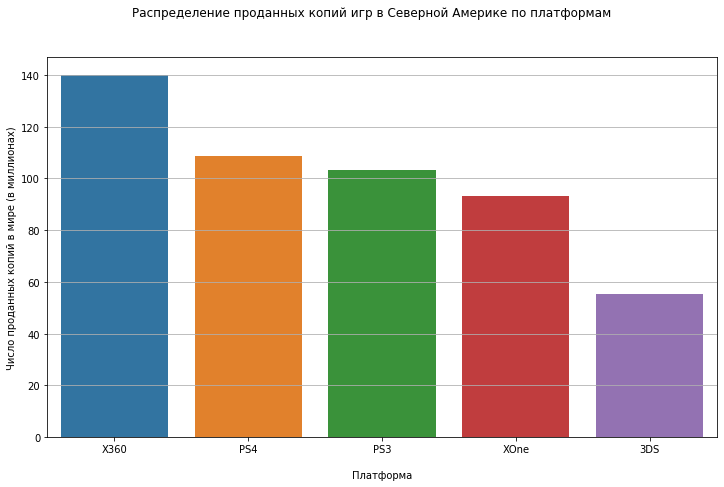

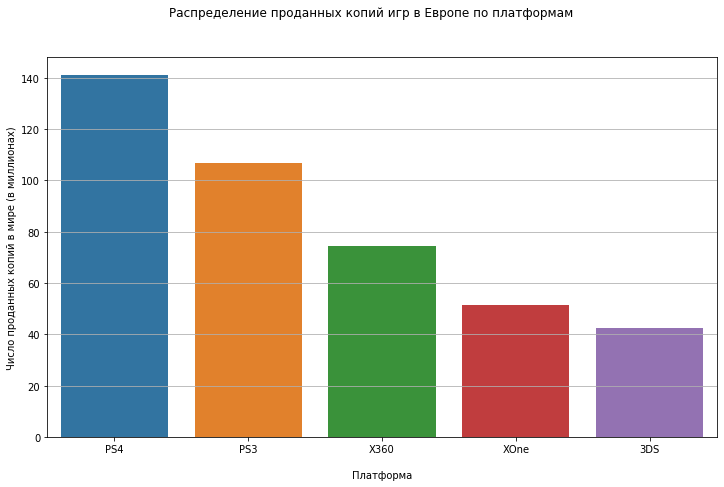

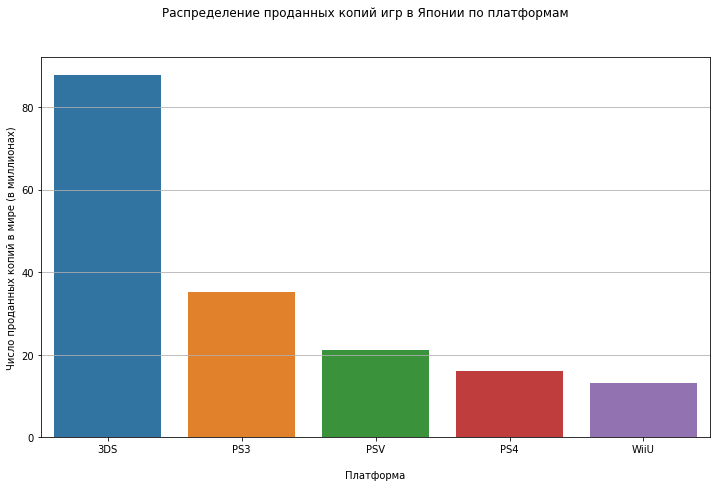

In [31]:
platforms_NA = (df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                .query('na_sales > 50').sort_values('na_sales', ascending=False))
platforms_EU = (df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                .query('eu_sales > 40').sort_values('eu_sales', ascending=False))
platforms_JP = (df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                .query('jp_sales > 11').sort_values('jp_sales', ascending=False))

i = 0
name2 = ['Распределение проданных копий игр в Северной Америке по платформам', 'Распределение проданных копий игр в Европе по платформам', 'Распределение проданных копий игр в Японии по платформам']
y_column = ['na_sales', 'eu_sales', 'jp_sales']
for research_group in [platforms_NA, platforms_EU, platforms_JP]:
    plt.figure(figsize=(12,7))
    plt.grid()
    sns.barplot(x = research_group.index, y = y_column[i], data = research_group)
    plt.suptitle(name2[i])
    plt.ylabel('Число проданных копий в мире (в миллионах)')
    plt.xlabel("\n" + 'Платформа')
    i+=1
    plt.show()

По графикам распределения проданных копий игр по платформам в регионах Северной Америки, Европы и Японии можно сделать следующие выводы:
* Во всех регионах лидируют разные платформы. В Северной Америке -  Xbox 360, в Европе - Sony PS4, в Японии - Nintendo 3DS;
* В топе регионов Северной Америки и Европы есть хотябы одна портативная консоль (3DS), а в Японии ТОП-5 занимают 3 портативные платформы (3DS, PSV, Wii U);
* Топ платформ в Северной Америке и Европе схож, хоть и места каждой платформы различается. Немного другая сетуация в Японии, здесь являются популярными платформы PSV и Wii U, которые не вошли в топ для других регионов.

* Топ-5 популярных жанров 

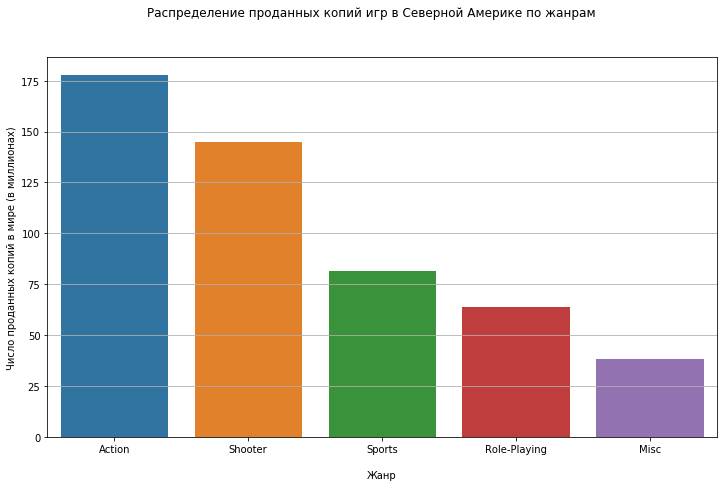

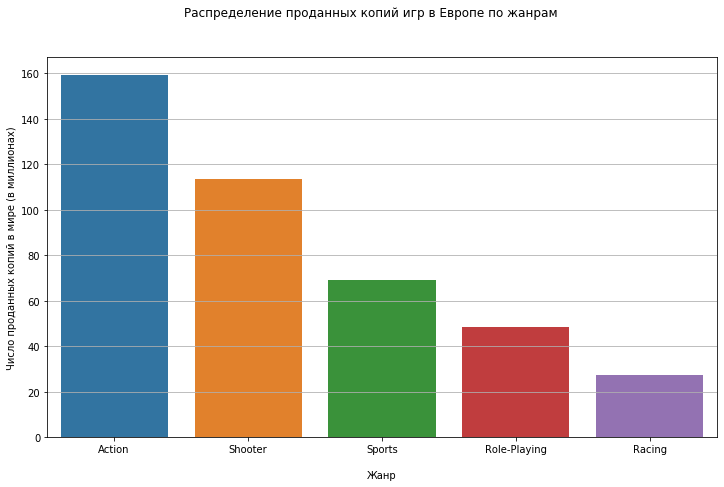

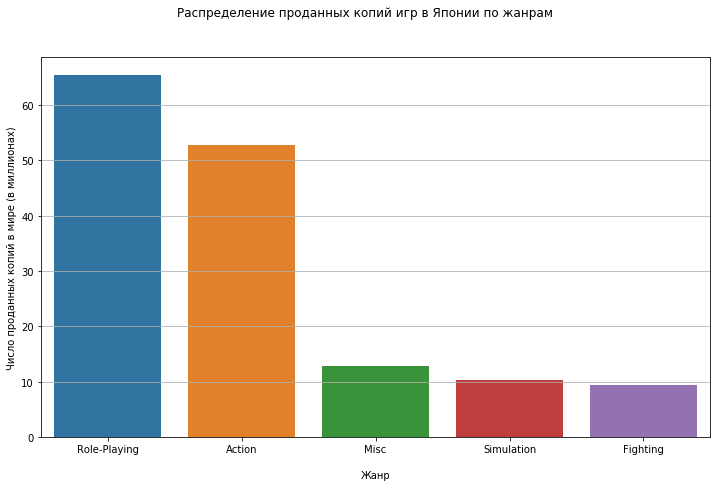

In [32]:
genre_NA = (df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
            .query('na_sales > 35').sort_values('na_sales', ascending=False))
genre_EU = (df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                .query('eu_sales > 27').sort_values('eu_sales', ascending=False))
genre_JP = (df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                .query('jp_sales > 9.3').sort_values('jp_sales', ascending=False))

i = 0
name3 = ['Распределение проданных копий игр в Северной Америке по жанрам', 'Распределение проданных копий игр в Европе по жанрам', 'Распределение проданных копий игр в Японии по жанрам']
for research_group in [genre_NA, genre_EU, genre_JP]:
    plt.figure(figsize=(12,7))
    plt.grid()
    sns.barplot(x = research_group.index, y = y_column[i], data = research_group)
    plt.suptitle(name3[i])
    plt.ylabel('Число проданных копий в мире (в миллионах)')
    plt.xlabel("\n" + 'Жанр')
    i+=1
    plt.show()

По графикам распределения проданных копий игр по жанрам в регионах Северной Америки, Европы и Японии можно сделать следующие выводы:

* В Северной Америке и Европе лидером продаж являются игры с жанром Action, а в Япноии - Role Playing;
* Жанры проданных игр в Европе и Серверной Америке примерно одинаковы. Отличается лишь 5-ая позиция (для Северной Америке - это разное, а для Европы - гоночные игры);
* В Японии виден болшой разрыв между первыми двумя позициями и остальными жанрами.

* Влияение рейтинга ESRB на продажи в отдельном регионе

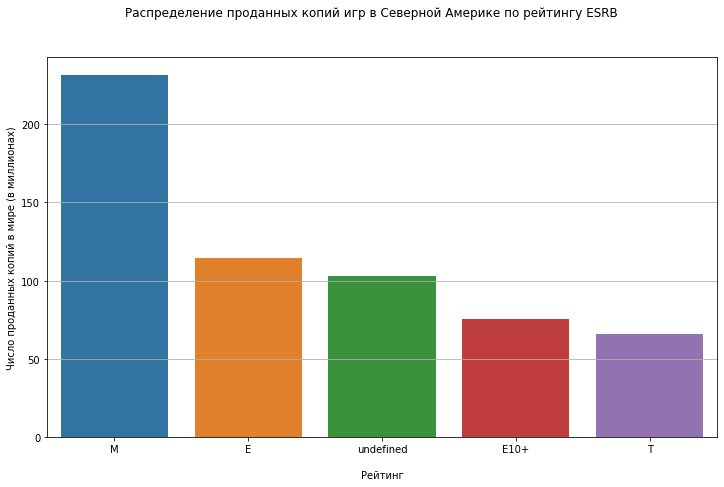

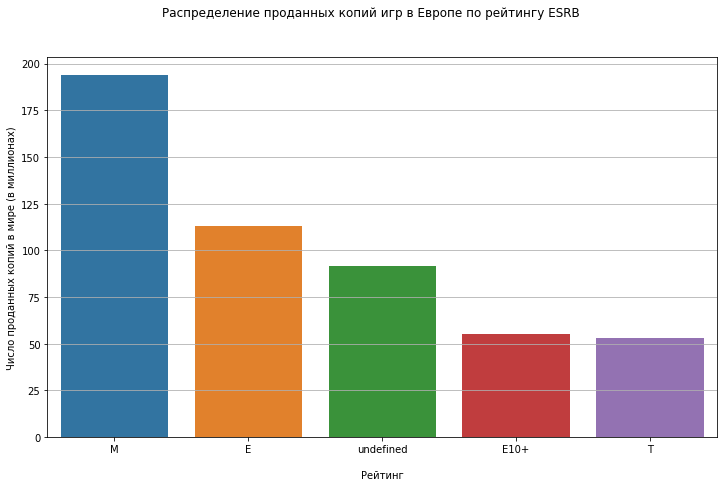

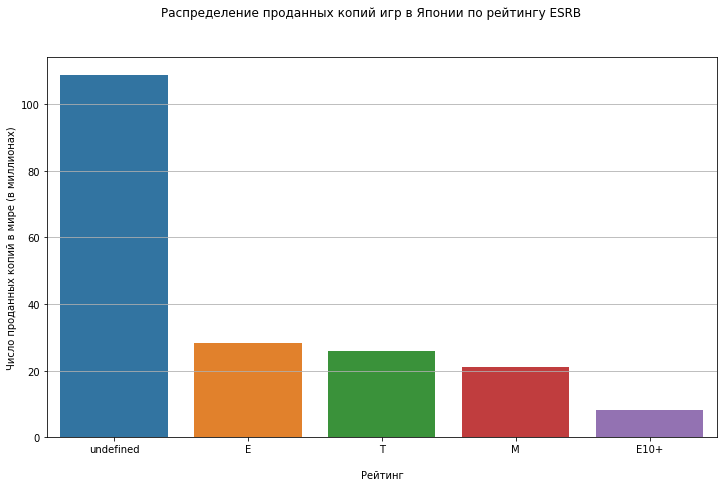

In [33]:
rating_NA = (df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False))
rating_EU = (df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False))
rating_JP = (df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False))

i = 0
name4 = ['Распределение проданных копий игр в Северной Америке по рейтингу ESRB', 'Распределение проданных копий игр в Европе по рейтингу ESRB', 'Распределение проданных копий игр в Японии по рейтингу ESRB']
for research_group in [rating_NA, rating_EU, rating_JP]:
    plt.figure(figsize=(12,7))
    plt.grid()
    sns.barplot(x = research_group.index, y = y_column[i], data = research_group)
    plt.suptitle(name4[i])
    plt.ylabel('Число проданных копий в мире (в миллионах)')
    plt.xlabel("\n" + 'Рейтинг')
    i+=1
    plt.show()

По графикам распределения проданных копий игр по рейтингу ESRB в регионах Северной Америки, Европы и Японии можно сделать следующие выводы:

* Самыми прибыльными играми в регионах Северной Америки и Европы являются игры с рейтингом  M (для лиц старше 17 лет), для Японии поплярный рейтинг - E (для детей от 6 лет);
* Поплярность игр с рейтингом М в Севрной Америке и Европе больше остальных примерно в 2 раза
* В Японии распределение продаж игр по рейтингу более плавная чем в других регионах;
* В данных присутствует огромное число игр без рейтинга (undefined), больше всего такие игры замечены в японском регионе.

### Вывод

В данном разделе были определен портрет пользователей регионов Северной Америки, Европы и Японии. По проделанной работе сделаны следующие выводы:

* Самые популярные платформы в Северной Америке - Xbox 360, в Европе - Sony PS4, в Японии - Nintendo 3DS
* Самые популярные жанры в Северной Америке и Европе - Action, в Японии - Role Play;
* Самые популярные игры в Северной Америке и Европе имеют рейтинг ESRB  M (для лиц старше 17 лет), а Японии -  E (для детей от 6 лет);
* Число проданных игр в Северной Америке и Европе по платформам, жанрам и рейтингу больше от числа проданных игр в Японии примерно в 2 раза;
* В данных присутствует огромное число игр без рейтинга (undefined), больше всего такие игры замечены в японском регионе.

## 5. Проверка гипотез<a id="hypotheses"></a>  

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем основную и альтернативную гипотизы:

Гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [34]:
XBOX_ONE = df_actual.query('platform == "XOne" and user_score > 0')
PC = df_actual.query('platform == "PC" and user_score > 0')

XBOX_ONE_mean = XBOX_ONE['user_score'].mean()
PC_mean = PC['user_score'].mean()
print('Cредний показатель рейтинга пользователей XBOX One {:.2f}:'.format(XBOX_ONE_mean))
print('Cредний показатель рейтинга пользователей PC: {:.2f}'.format(PC_mean))

Cредний показатель рейтинга пользователей XBOX One 6.52:
Cредний показатель рейтинга пользователей PC: 6.43


In [35]:
alpha = 0.05
results1 = st.ttest_ind(XBOX_ONE['user_score'], PC['user_score'])
print('pvalue = ', results1.pvalue)
if results1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue =  0.5535102808074094
Не получилось отвергнуть нулевую гипотезу


Сравнив две совокупности, приходим к выводу, что пользовательские рейтинги платформ Xbox One и PC примерно одинаковые.

* Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем основную и альтернативную гипотизы:

Гипотеза H₀: средние пользовательские рейтинги жанров Action и Sports одинаковые;

Гипотеза H₁: средние пользовательские рейтинги жанров Action и Sports различаются.

In [36]:
Action = df_actual.query('genre == "Action" and user_score > 0')
Sports = df_actual.query('genre == "Sports" and user_score > 0')

Action_mean = Action['user_score'].mean()
Sports_mean = Sports['user_score'].mean()
print('Cредний показатель пользовательского рейтинга жанра Action {:.2f}:'.format(Action_mean))
print('Cредний показатель пользовательского рейтинга жанра Sports: {:.2f}'.format(Sports_mean))

Cредний показатель пользовательского рейтинга жанра Action 6.83:
Cредний показатель пользовательского рейтинга жанра Sports: 5.46


In [37]:
alpha = 0.05
results2 = st.ttest_ind(Action['user_score'], Sports['user_score'])
print('pvalue = ', results2.pvalue)
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue =  3.7160944611827317e-26
Отвергаем нулевую гипотезу


По полученной вероятности видно, что между показателями пользовательского рейтинга жанров Action и Sports существует различие.

## 6. Общие выводы<a id="conclusions"></a>  

В ходе выполнения проекта проведено исследование продаж игр в интернет-магазине.

Перед проведением исследования данных было произведено первичное изучение файла, в ходе которого выявлены пустые значения и различия типов данных.

При подготовке данных были оптимизированы и переведены типы данных. Нулевые значения оставлены без изменений.

Проведя анализ имеющихся даннах выяснились следующее выводы:

* Производство игр начало активно разрастется после середины 90-х годов и дошла своего пика в 2008 году (1427 выпущенных игр), и после чего начало активно падать;
* За все время самыми популярными платформами являются PS, PS 2, PS 3, Xbox 360, Nentendo DS и Nentendo Wii;
* За период с 2012 по 2016 годы популярными платформами являются PS 4, PS 3, Xbox 360, Nintendo 3DS и Xbox One;
* Прибыльными являются платформами PS 4, Xbox One и PC, т.к. на 2017 год для данных платформ прогнозируется рост продаж игр;
* Отзывы критиков имеет некоторое влияние на продажи игр, а отзывы пользователей также влияют на продажи игр, но чуть меньше чем отзывы критиков;
* Самым прибыльным жанром является Action (389 млн. проданных копий). Непопулярные жанры - стратегии и пазлы (12 млн. и 4 млн. проданных копий соответственно);
* Больше всего продаются игры с такими жанрами, которым присуще простые правила, подвижность и зрелищность. Соответственно, сложные и невзрачные по графике игры менее прибыльны.

Составив портрет пользователей регионов Северной Америки, Европы и Японии сделаны следующие выводы:

* Самые популярные платформы в Северной Америке - Xbox 360, в Европе - Sony PS4, в Японии - Nintendo 3DS
* Самые популярные жанры в Северной Америке и Европе - Action, в Японии - Role Play;
* Самые популярные игры в Северной Америке и Европе имеют рейтинг ESRB M (для лиц старше 17 лет), а Японии - E (для детей от 6 лет);
* Число проданных игр в Северной Америке и Европе по платформам, жанрам и рейтингу больше от числа проданных игр в Японии примерно в 2 раза.
* В данных присутствует огромное число игр без рейтинга (undefined), больше всего такие игры замечены в японском регионе.

Проверка гипотез двух генеральных совокупностей показала, что в первом случае средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые. Во втором случае средние пользовательские рейтинги жанров Action и Sports оказались различными.